In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [61]:
df = pd.read_csv('data_wisconsin_breast.csv')

In [62]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [63]:
df.shape

(569, 33)

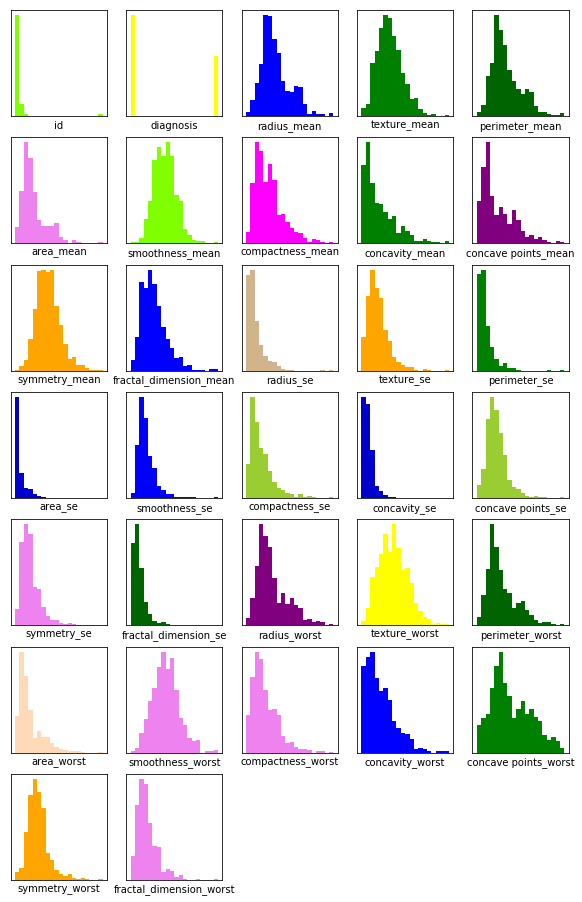

In [64]:
import random

list_color = ['blue', 'red', 'green', 'yellow', 'purple', 
              'black', 'violet', 'orange', 'magenta', 'cyan', 
              'darkgreen', 'tan', 'mediumblue', 'yellowgreen', 'chartreuse', 'peachpuff']
plt.figure(figsize=(10,16))
i = 0
for j in df.columns:
    if i < 32:
        plt.subplot(7,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.hist(df[j], color=list_color[random.randint(0,15)], bins=20)
        plt.xlabel(j)
        i += 1

In [65]:
label = df['diagnosis']
df = df.drop('diagnosis', axis=1)

In [66]:
label_bool = [1 if f == 'M' else 0 for f in label]
label_bool

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [67]:
df = df.drop('id', axis=1)

In [68]:
df = df.fillna(0)

# MLP CLASSiFIER

In [69]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test =  train_test_split(df, label_bool, test_size=0.2, random_state=123)

In [70]:
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [71]:
model = MLPClassifier(activation='relu', alpha=1e-3, solver='lbfgs', validation_fraction=0.1)
mlp = model.fit(X_train, y_train)

In [72]:
y_predict = mlp.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix

score = mlp.score(X_test, y_test)
print('Score is {}'.format(score))
confusion = confusion_matrix(y_test, y_predict)
confusion = pd.DataFrame(confusion, columns=['B', 'M'], index=['B', 'M'])
print(confusion)

Score is 0.9912280701754386
    B   M
B  73   0
M   1  40


In [74]:
confusion

,B,M
B,73,0
M,1,40
